In [1]:
import glob
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
import ast

In [2]:
os.getcwd()
PATH=os.getcwd()+'/data/out/predictive'

In [3]:
def read_data_from_folder(folder_path):
    dfs = pd.DataFrame()
    file_count = 0  # counter for loaded files

    # Regex to extract the number after "participant_" and before ".csv"
    # This regex looks for "participant_" followed by one or more digits (\d+)
    # and captures these digits. It expects ".csv" at the end.
    participant_id_regex = re.compile(r'participant_(\d+)\.csv')


    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)

            # Extract model_id from filename using regex
            match = participant_id_regex.search(filename)
            if match:
                model_id = int(match.group(1)) # Convert the captured digits to an integer
                df['model_id'] = model_id # Add the model_id column
            else:
                # Handle cases where the filename doesn't match the expected format
                print(f"Warning: Could not extract model_id from filename: {filename}")
                df['model_id'] = None # Or some other indicator of missing ID

            dfs = pd.concat([dfs, df], ignore_index=True)
            file_count += 1  # increment counter

    print(f"{file_count} CSV file(s) loaded.")
    return dfs

In [4]:
df_centaur=read_data_from_folder(f'{PATH}/centaur-8B/singles')

6 CSV file(s) loaded.


In [5]:
# save choices where model and human agree
df_centaur_model_human = df_centaur[df_centaur['model_choice'] == df_centaur['choice']].copy()

In [6]:
#sum of nll for agreement
val_nll_centaur_8b_model_human=-(df_centaur_model_human['log_likelihood'].sum())

In [7]:
#sum of nll for all choices
val_nll=-(df_centaur['log_likelihood'].sum())

In [8]:
def calculate_log_likelihood_stats(df, column_name='log_likelihood'):
    """
    Calculates the mean and standard error of the mean (SEM)
    for the specified column in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame containing a
                           'log_likelihood' column.

    Returns:
        tuple: A tuple containing the mean log-likelihood and the SEM.
    """
    # Drop missing log-likelihoods (NaN)
    valid_ll = df[column_name].dropna()

    # Compute mean and SEM
    if not valid_ll.empty:
        mean_ll = valid_ll.mean()
        sem_ll = valid_ll.std(ddof=1) / np.sqrt(len(valid_ll))
        return mean_ll, sem_ll
    else:
        return None, None

In [9]:
mean_ll_centaur_8b, sem_ll_centaur_8b = calculate_log_likelihood_stats(df_centaur)

In [10]:
mean_ll_centaur_8b_human, sem_ll_centaur_8b_human = calculate_log_likelihood_stats(df_centaur_model_human)
print(f"Mean Log-Likelihood (centaur_8b_human): {mean_ll_centaur_8b_human:.4f}")
print(f"SEM (centaur_8b_human): {sem_ll_centaur_8b_human:.4f}")

Mean Log-Likelihood (centaur_8b_human): -0.2436
SEM (centaur_8b_human): 0.0019


In [11]:
df_centaur_70b=read_data_from_folder(f'{PATH}/centaur-70B/singles')

6 CSV file(s) loaded.


In [12]:
mean_ll_centaur_70b, sem_ll_centaur_70b = calculate_log_likelihood_stats(df_centaur_70b)
print(f"Mean Log-Likelihood (centaur_70b): {mean_ll_centaur_70b:.4f}")
print(f"SEM (centaur_70b): {sem_ll_centaur_70b:.4f}")

Mean Log-Likelihood (centaur_70b): -0.4111
SEM (centaur_70b): 0.0048


In [13]:
centaur_70b_model_human = df_centaur_70b[df_centaur_70b['model_choice'] == df_centaur_70b['choice']].copy()

In [14]:
mean_ll_centaur_70b_model_human, sem_ll_centaur_70b_model_human = calculate_log_likelihood_stats(centaur_70b_model_human)
print(f"Mean Log-Likelihood (centaur_70b_model_human): {mean_ll_centaur_70b_model_human:.4f}")
print(f"SEM (centaur_70b_model_human): {sem_ll_centaur_70b_model_human:.4f}")

Mean Log-Likelihood (centaur_70b_model_human): -0.2703
SEM (centaur_70b_model_human): 0.0021


In [15]:
df_llama=read_data_from_folder(f'{PATH}/llama-8B/singles')

6 CSV file(s) loaded.


In [16]:
df_llama

,participant_id,block,game,horizon,info_condition,reward_mean_H,reward_mean_I,trial_num,choice,reward,cumulative_reward,is_free,log_likelihood,model_choice,top2_tokens,model_id
0,1,1,1,1,3,40,70,1,I,66,250,False,NaN,NaN,NaN,1
1,1,1,1,1,3,40,70,2,I,80,250,False,NaN,NaN,NaN,1
2,1,1,1,1,3,40,70,3,H,29,250,False,NaN,NaN,NaN,1
3,1,1,1,1,3,40,70,4,I,75,250,False,NaN,NaN,NaN,1
4,1,1,1,1,3,40,70,5,I,81,331,True,-0.179688,I,"[{'token': 'I', 'prob': 0.8359375}, {'token': ...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,7,4,320,1,2,48,40,1,H,51,187,False,NaN,NaN,NaN,7
14396,7,4,320,1,2,48,40,2,I,40,187,False,NaN,NaN,NaN,7
14397,7,4,320,1,2,48,40,3,I,40,187,False,NaN,NaN,NaN,7
14398,7,4,320,1,2,48,40,4,H,56,187,False,NaN,NaN,NaN,7


In [17]:
df_llama_free=df_llama[df_llama['is_free']==True]

In [18]:
mean_ll_llama, sem_ll_llama = calculate_log_likelihood_stats(df_llama_free)
print(f"Mean Log-Likelihood (llama): {mean_ll_llama:.4f}")
print(f"SEM (llama): {sem_ll_llama:.4f}")

Mean Log-Likelihood (llama): -0.5032
SEM (llama): 0.0059


In [19]:
llama_8b_model_human = df_llama_free[df_llama_free['model_choice'] == df_llama_free['choice']].copy()

In [20]:
mean_ll_llama_8b_model_human, sem_ll_llama_8b_model_human = calculate_log_likelihood_stats(llama_8b_model_human)
print(f"Mean Log-Likelihood (llama_8b_model_human): {mean_ll_llama_8b_model_human:.4f}")
print(f"SEM (llama_8b_model_human): {sem_ll_llama_8b_model_human:.4f}")

Mean Log-Likelihood (llama_8b_model_human): -0.3400
SEM (llama_8b_model_human): 0.0047


In [21]:
df_llama_70b=read_data_from_folder(f'{PATH}/llama-70B/singles')

6 CSV file(s) loaded.


In [22]:
df_llama_70b_free=df_llama_70b[df_llama_70b['is_free']==True]

In [23]:
mean_ll_llama_70b, sem_ll_llama_70b = calculate_log_likelihood_stats(df_llama_70b_free)
print(f"Mean Log-Likelihood (llama_70b): {mean_ll_llama_70b:.4f}")
print(f"SEM (llama_70b): {sem_ll_llama_70b:.4f}")

Mean Log-Likelihood (llama_70b): -0.6035
SEM (llama_70b): 0.0184


In [24]:
llama_70b_model_human = df_llama_70b_free[df_llama_70b_free['model_choice'] == df_llama_70b_free['choice']].copy()

In [25]:
mean_ll_llama_70b_model_human, sem_ll_llama_70b_model_human = calculate_log_likelihood_stats(llama_70b_model_human)
print(f"Mean Log-Likelihood (llama_70b_model_human): {mean_ll_llama_70b_model_human:.4f}")
print(f"SEM (llama_70b_model_human): {sem_ll_llama_70b_model_human:.4f}")

Mean Log-Likelihood (llama_70b_model_human): -0.0708
SEM (llama_70b_model_human): 0.0028


In [ ]:
import json

with open(f'{PATH}/rw/rw_model_metrics.json', 'r') as f:
    metrics_data = json.load(f)


In [27]:
metrics_data

{'validation_nll': 2796.5716051906124,
 'average_log_loss_per_trial': 0.41615648886765066}

In [28]:
# prompt: extract average loss into mean_rw

# The negative log-likelihood is the loss.
# The average loss is the mean negative log-likelihood.
# The function calculate_log_likelihood_stats returns the mean log-likelihood.
# We need the negative of this mean for the average loss.
mean_rw = metrics_data.get('average_log_loss_per_trial', None)

In [29]:
sem_rw=mean_rw/np.sqrt(len(df_centaur))

In [30]:
def set_dynamic_fontsize(fig_width=12, base_font=20):
    scale = fig_width / 6  # 6 is your baseline width, adjust as needed
    plt.rcParams.update({
        'font.size': base_font * scale * 0.65,
        'axes.titlesize': base_font * scale * 1.2,
        'axes.labelsize': base_font * scale * 0.9,
        'xtick.labelsize': base_font * scale * 0.9,
        'ytick.labelsize': base_font * scale * 0.9,
        'legend.fontsize': base_font * scale,
    })

In [31]:
def plot_loglikelihood_bars(mu_centaur=None, sd_centaur=None,
                             mu_centaurB=None, sd_centaurB=None,
                             mu_llama=None, sd_llama=None,
                             mu_llamaB=None, sd_llamaB=None,
                             mu_rw=None, sd_rw=None,
                             mu_rep=None, sd_rep=None,
                             variant_labels=None,
                             family_labels=None,
                             colors=None,
                             figsize=(12, 10),
                             families=None,
                             yticks=None):
    """
    Flexible grouped bar plot for NLL means with different model families.
    
    Parameters
    ----------
    mu_centaur, sd_centaur : float
        Mean and standard error for Centaur 8B model
    mu_centaurB, sd_centaurB : float
        Mean and standard error for Centaur 70B model
    mu_llama, sd_llama : float, optional
        Mean and standard error for LLaMA 8B model
    mu_llamaB, sd_llamaB : float, optional
        Mean and standard error for LLaMA 70B model
    mu_rw, sd_rw : float, optional
        Mean and standard error for RW model
    mu_rep, sd_rep : float, optional
        Mean and standard error for Rep model
    variant_labels : list of str, optional
        Labels for each bar
    family_labels : list of str, optional
        Labels for each family group
    colors : list of str, optional
        Colors for each bar
    figsize : tuple, optional
        Figure size
    families : list of str, optional
        List of model families to include ('centaur', 'llama', 'rw', 'rep')
    """
    # Default families if not specified
    if families is None:
        families = []
        # Auto-detect which families are provided
        if mu_centaur is not None and sd_centaur is not None and mu_centaurB is not None and sd_centaurB is not None:
            families.append('centaur')
        if mu_llama is not None and sd_llama is not None and mu_llamaB is not None and sd_llamaB is not None:
            families.append('llama')
        if mu_rw is not None and sd_rw is not None:
            families.append('rw')
        if mu_rep is not None and sd_rep is not None:
            families.append('rep')

    # Default labels
    if variant_labels is None:
        variant_labels = ['Centaur 8B', 'Centaur 70B', 'LLaMA 8B', 'LLaMA 70B', 'RW', 'Rep']
    if family_labels is None:
        family_labels = ['Centaur', 'LLaMA 3.1', 'Domain-Specific\nModel']
    if colors is None:
        colors = ['#E69F00', '#D55E00', '#56B4E9', '#0072B2', '#CC79A7', '#CC79A7']

    # Collect means, errors, and labels based on specified families
    means, errs, used_labels = [], [], []
    family_slices = []
    current_idx = 0

    # Process Centaur family if included
    if 'centaur' in families:
        if mu_centaur is None or sd_centaur is None or mu_centaurB is None or sd_centaurB is None:
            raise ValueError("Centaur family requires mu_centaur, sd_centaur, mu_centaurB, and sd_centaurB")
        
        means += [-mu_centaur, -mu_centaurB]  # Invert NLLs for Centaur models
        errs += [sd_centaur, sd_centaurB]
        used_labels += variant_labels[0:2]
        family_slices.append((current_idx, current_idx + 1))
        current_idx += 2

    # Process LLaMA family if included
    if 'llama' in families:
        if mu_llama is None or sd_llama is None or mu_llamaB is None or sd_llamaB is None:
            raise ValueError("LLaMA family requires mu_llama, sd_llama, mu_llamaB, and sd_llamaB")
        
        means += [mu_llama, mu_llamaB]  # Note: not inverted by default
        errs += [sd_llama, sd_llamaB]
        used_labels += variant_labels[2:4]
        family_slices.append((current_idx, current_idx + 1))
        current_idx += 2

    # Process RW model if included
    if 'rw' in families:
        if mu_rw is None or sd_rw is None:
            raise ValueError("RW family requires mu_rw and sd_rw")
            
        means.append(mu_rw)
        errs.append(sd_rw)
        used_labels.append(variant_labels[4])
        family_slices.append(current_idx)
        current_idx += 1

    # Process Rep model if included
    if 'rep' in families:
        if mu_rep is None or sd_rep is None:
            raise ValueError("Rep family requires mu_rep and sd_rep")
            
        means.append(mu_rep)
        errs.append(sd_rep)
        used_labels.append(variant_labels[5])
        family_slices.append(current_idx)
        current_idx += 1

    # Ensure we have at least one model to plot
    if not means:
        raise ValueError("No valid model families specified. Please provide at least one complete family.")

    # Bar positioning
    w = 0.5
    gap_in = 0.0
    gap_out = 0.1

    xpos = [0]
    for i in range(1, len(means)):
        # Determine if this is a new family group
        new_family = False
        for fslice in family_slices:
            if isinstance(fslice, tuple):
                if i == fslice[0] + 1:
                    new_family = False  # Within same family
                    break
            if i == fslice:
                new_family = True  # Start of new family
                break
        
        if new_family:
            xpos.append(xpos[-1] + w + gap_out)
        else:
            xpos.append(xpos[-1] + w + gap_in)
            
    xpos = np.array(xpos)

    # Plot
    fig, ax = plt.subplots(figsize=figsize)

    if len(colors) < len(means):
        colors += ['#CC79A7'] * (len(means) - len(colors))

    bars = ax.bar(xpos, means, w, yerr=errs, capsize=5,
                  color=colors[:len(means)], edgecolor='black', linewidth=0.3)

    # Annotate
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Chance line
    chance_nll = -np.log(0.5)
    ax.axhline(chance_nll, ls='--', c='grey', lw=1.2)
    ax.text(xpos[-1]-0.3, chance_nll, 'Random guessing',
            va='bottom', ha='left')

    # X-axis
    ax.set_xticks(xpos)
    ax.set_xticklabels(used_labels, ha='center')

    # Add family labels as secondary x-axis
    family_centers = [
        (xpos[fslice[0]] + xpos[fslice[1]])/2 if isinstance(fslice, tuple) else xpos[fslice]
        for fslice in family_slices
    ]

    ax2 = ax.secondary_xaxis('bottom')
    ax2.set_xticks(family_centers)
    ax2.set_xticklabels(family_labels[:len(family_centers)])
    ax2.spines['bottom'].set_visible(False)  # optional: hide duplicate spine
    ax2.xaxis.set_label_position('bottom')
    pad_value = figsize[1] * 7  # multiplier can be adjusted
    ax2.tick_params(axis='x', pad=pad_value, length=0)



    # Group dividers
    for i in range(len(family_slices) - 1):
        fslice = family_slices[i]
        if isinstance(fslice, tuple):
            _, i1 = fslice
            divider_pos = xpos[i1] + w/2 + gap_out/2
        else:
            divider_pos = xpos[fslice] + w/2 + gap_out/2
        ax.axvline(divider_pos, color='grey', lw=1)

    ax.set_ylabel('Negative Log-Likelihood (NLL)',labelpad=20)
    if yticks is not None:
        ax.set_yticks(yticks)
# Move label slightly to the left of the axis and below y=0
    ax.yaxis.set_label_coords(-0.12,0.4)  # (x, y) in axis coordinates

    ax.spines[['top','right','left','bottom']].set_visible(True)
    ax.grid(False)
    ax.margins(x=0.04)
    plt.tight_layout()
    return fig

In [32]:
#human,centaur-7b,centaur-80b,llama-8b,llama-reason,rw,some other
colors_grouped= ['#44403B','#E69F00', '#D55E00', '#56B4E9', '#0072B2','#CC79A7','#009E73']

In [33]:
yticks = np.arange(0, 1.8, 0.3)

In [35]:
set_dynamic_fontsize(fig_width=14, base_font=20)

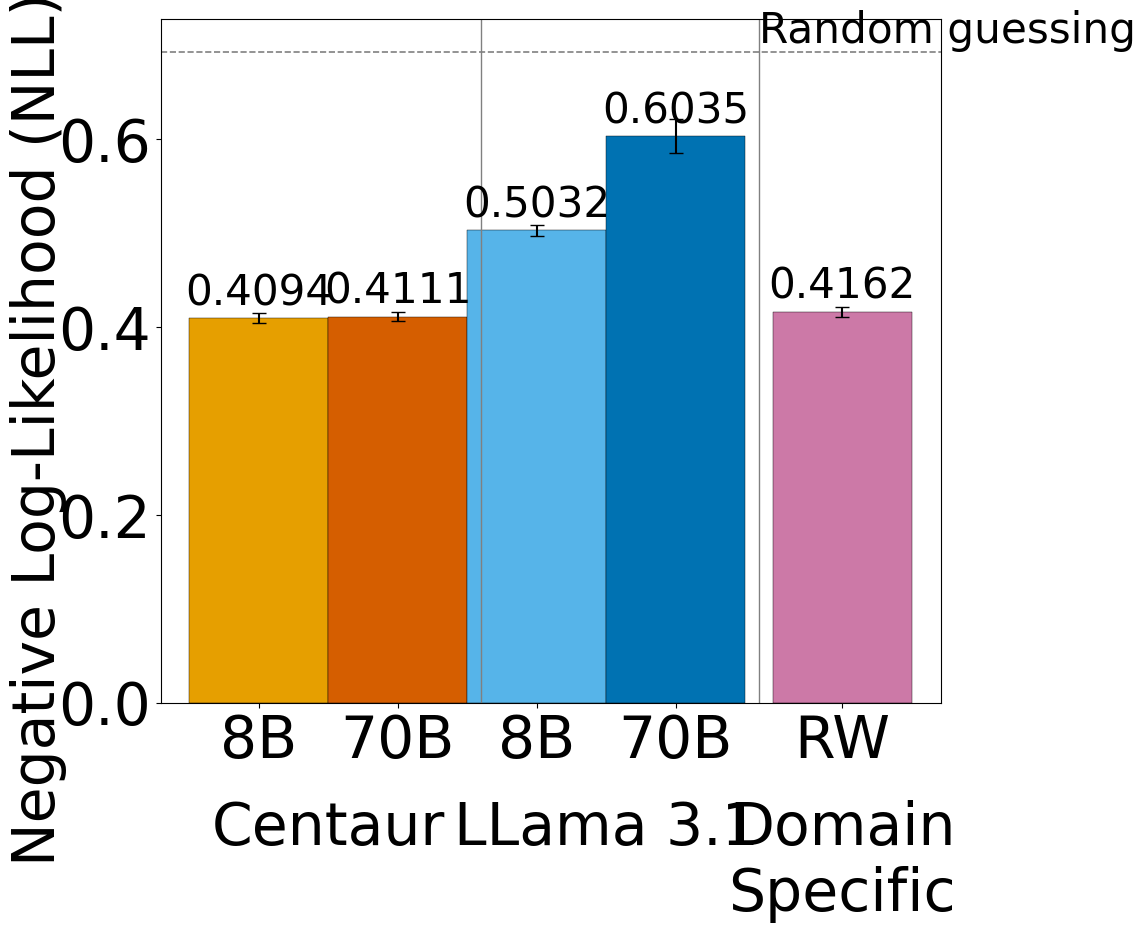

In [36]:
nll_reverse_learning=plot_loglikelihood_bars(
    mu_centaur=mean_ll_centaur_8b,mu_centaurB=mean_ll_centaur_70b,mu_llama=-mean_ll_llama,mu_llamaB=-mean_ll_llama_70b,mu_rw=mean_rw,
    sd_centaur=sem_ll_centaur_8b,sd_centaurB=sem_ll_centaur_70b,sd_llama=sem_ll_llama,sd_llamaB=sem_ll_llama_70b,sd_rw=sem_rw,
    colors=colors_grouped[1:],
    variant_labels=['8B', '70B', '8B', '70B', 'RW', 'Rep'],
    family_labels=['Centaur', 'LLama 3.1', 'Domain\nSpecific']
                                             )

In [37]:
colors_large_models_only= ['#D55E00', '#0072B2', '#CC79A7', '#009E73']

In [38]:
set_dynamic_fontsize(fig_width=12, base_font=20)

In [54]:
yticks = np.arange(0, 1.8, 0.3)

In [55]:
yticks

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5])

New family at index 2
New family at index 4


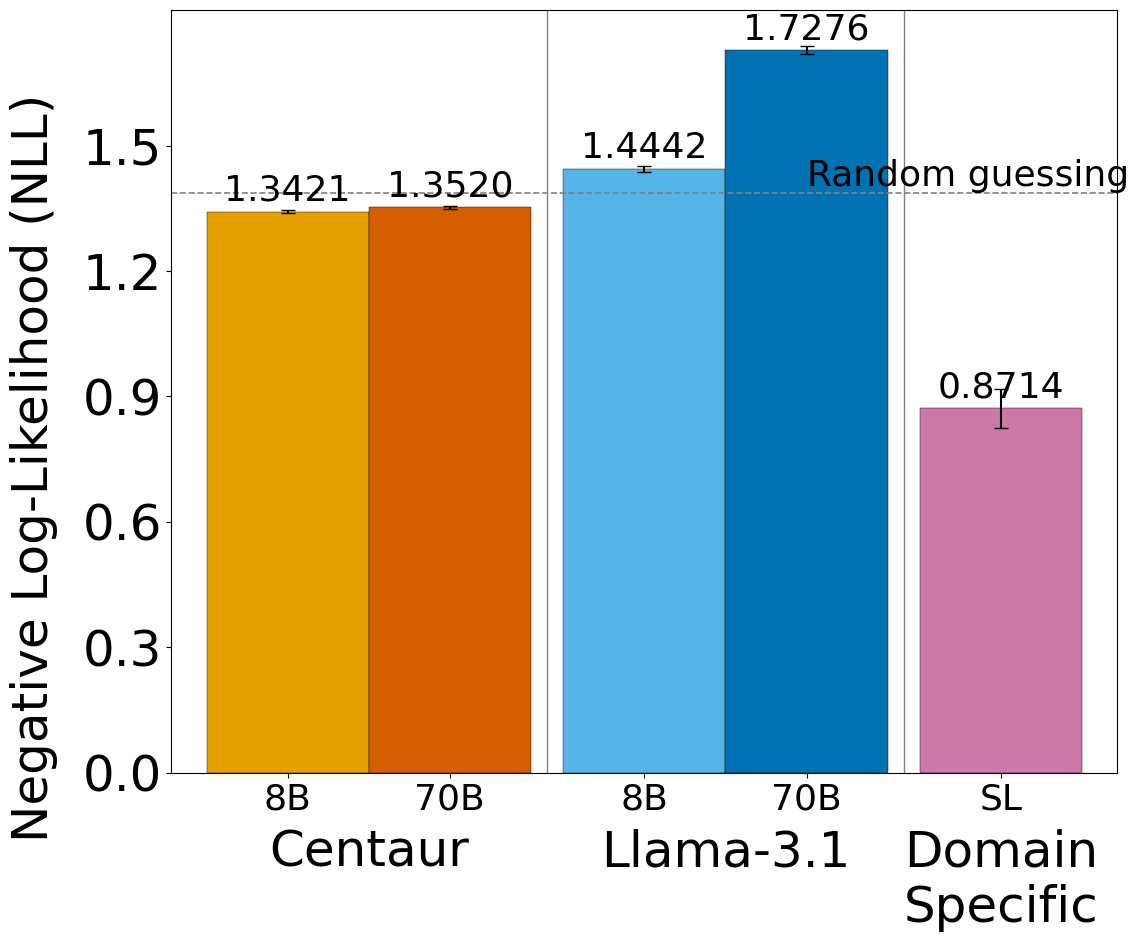

In [67]:
fig=plot_loglikelihood_bars(
    mu_centaur=-mu_centaur, sd_centaur=sd_centaur,
    mu_centaurB=-mu_centaurB, sd_centaurB=sd_centaurB,
    mu_llama=mu_llama, sd_llama=sd_llama,
    mu_llamaB=mu_llamaB, sd_llamaB=sd_llamaB,
    mu_rw=mu_sl, sd_rw=sd_sl,
    variant_labels=['8B', '70B', '8B', '70B', 'SL', 'Rep'],
    family_labels=['Centaur', 'Llama-3.1', 'Domain\nSpecific'],  # Fixed: Each model needs a family label
    colors=colors_grouped[1:],
    families=['centaur', 'llama', 'rw'],
    random_guessing=-np.log(0.25),
    figsize=(12,10),
    yticks=yticks
)

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def plot_loglikelihood_bars_large(
        mu_centaur=None, sd_centaur=None,
        mu_llama=None, sd_llama=None,
        mu_rw=None, sd_rw=None,
        mu_rep=None, sd_rep=None,
        variant_labels=None,
        family_labels=None,
        colors=None,
        figsize=(12, 10),
        families=None):
    """
    Flexible grouped bar plot for NLL means with different model families.
    Works also with single-data families.
    """

    # Default families if not specified
    if families is None:
        families = []
        if mu_centaur is not None and sd_centaur is not None:
            families.append('centaur')
        if mu_llama is not None and sd_llama is not None:
            families.append('llama')
        if mu_rw is not None and sd_rw is not None:
            families.append('rw')
        if mu_rep is not None and sd_rep is not None:
            families.append('rep')

    if variant_labels is None:
        variant_labels = ['Centaur 70B', 'LLama 70B', 'RW', 'Rep']
    if family_labels is None:
        family_labels = ['Centaur', 'LLama 3.1', 'Domain-Specific\nModel', 'Rep']
    if colors is None:
        colors = ['#E69F00', '#D55E00', '#56B4E9', '#0072B2', '#CC79A7']

    means, errs, used_labels = [], [], []
    family_slices = []
    current_idx = 0

    # Helper to append family data flexibly
    def add_family(mu, sd, label, family_name):
        nonlocal current_idx
        if mu is None or sd is None:
            return
        if isinstance(mu, (list, np.ndarray)):
            n = len(mu)
            means.extend(mu)
            errs.extend(sd)
            used_labels.extend(label[:n])
            family_slices.append((current_idx, current_idx + n - 1))
            current_idx += n
        else:
            means.append(mu)
            errs.append(sd)
            used_labels.append(label[0])
            family_slices.append(current_idx)
            current_idx += 1

    # Process all families
    if 'centaur' in families:
        add_family([-mu_centaur], [sd_centaur], variant_labels[0:1], 'centaur')
    if 'llama' in families:
        add_family([mu_llama], [sd_llama], variant_labels[1:2], 'llama')
    if 'rw' in families:
        add_family(mu_rw, sd_rw, variant_labels[2:3], 'rw')
    if 'rep' in families:
        add_family(mu_rep, sd_rep, variant_labels[3:4], 'rep')

    if not means:
        raise ValueError("No valid model families specified.")

    # Bar positioning
    w = 0.7
    gap_in = 0
    gap_out = 0.1
    xpos = [0]
    for i in range(1, len(means)):
        new_family = any(
            (isinstance(f, tuple) and i == f[0]) or (i == f)
            for f in family_slices
        )
        xpos.append(xpos[-1] + w + (gap_out if new_family else gap_in))
    xpos = np.array(xpos)

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    if len(colors) < len(means):
        colors += [colors[-1]] * (len(means) - len(colors))

    bars = ax.bar(xpos, means, w, yerr=errs, capsize=5,
                  color=colors[:len(means)], edgecolor='black', linewidth=0.3)

    # Annotate each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

    # Chance line
    chance_nll = -np.log(0.5)
    ax.axhline(chance_nll, ls='--', c='grey', lw=1.2)
    ax.text(xpos[-1] - figsize[0]*0.04, chance_nll,
            'Random guessing', va='bottom', ha='left')

    # X-axis labels
    ax.set_xticks(xpos)
    ax.set_xticklabels(used_labels, ha='center',
                       fontsize=20*(figsize[0]/6)*0.65)

    # Family labels (works with 1-point families)
    family_centers = [
        (xpos[f[0]] + xpos[f[1]])/2 if isinstance(f, tuple) else xpos[f]
        for f in family_slices
    ]
    ax2 = ax.secondary_xaxis('bottom')
    ax2.set_xticks(family_centers)
    ax2.set_xticklabels(family_labels[:len(family_centers)])
    ax2.spines['bottom'].set_visible(False)
    ax2.tick_params(axis='x', pad=figsize[1]*4, length=0)

    # Group dividers
    for i in range(len(family_slices) - 1):
        f = family_slices[i]
        divider_pos = xpos[f[1]] + w/2 + gap_out/2 if isinstance(f, tuple) else xpos[f] + w/2 + gap_out/2
        ax.axvline(divider_pos, color='grey', lw=1)

    # Labels and styling
    ax.set_ylabel('Negative Log-Likelihood (NLL)', labelpad=20)
    ax.yaxis.set_label_coords(-0.12, 0.4)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(True)
    ax.grid(False)
    ax.margins(x=0.04)
    plt.tight_layout()
    return fig


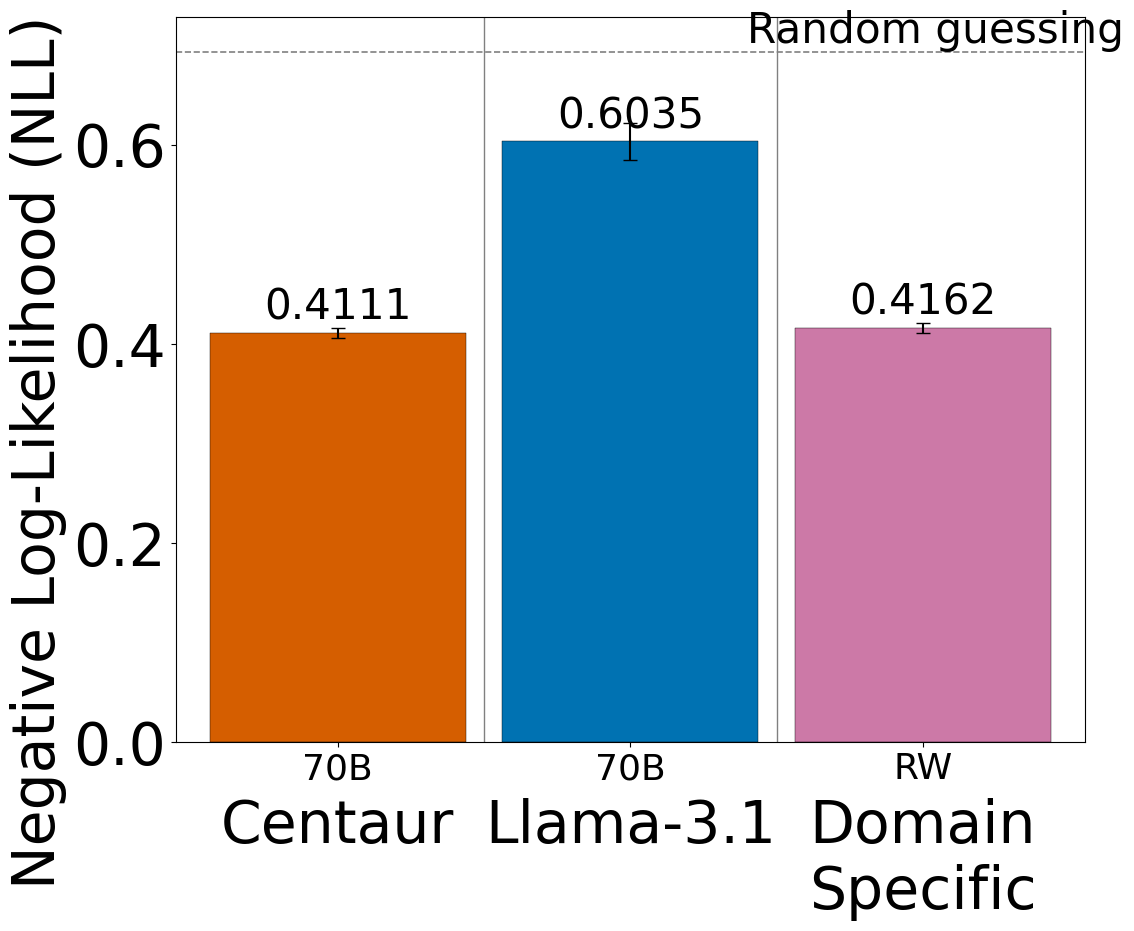

In [46]:
nll_horizon_large_models_only = plot_loglikelihood_bars_large(
    mu_centaur=mean_ll_centaur_70b, sd_centaur=sem_ll_centaur_70b,
    mu_llama=-mean_ll_llama_70b, sd_llama=sem_ll_llama_70b,
    mu_rw=mean_rw, sd_rw=sem_rw,
    variant_labels=['70B', '70B', 'RW'],
    family_labels=['Centaur', 'Llama-3.1', 'Domain\nSpecific'],  # Fixed: Each model needs a family label
    colors=colors_large_models_only,
    families=['centaur', 'llama', 'rw'],
    figsize=(12,10)
)

In [47]:
# prompt: function that calculates percentage when model_choice==human_choice
def calculate_agreement_percentage(df):
    """
    Calculates the percentage of rows where 'model_choice' equals 'human_choice'.

    Args:
        df (pd.DataFrame): The input DataFrame containing 'model_choice' and 'human_choice' columns.

    Returns:
        float: The percentage of agreement between model and human choices.
               Returns 0.0 if the DataFrame is empty or has no 'model_choice' or 'human_choice' columns.
    """
    if 'model_choice' not in df.columns or 'choice' not in df.columns or df.empty:
        return 0.0

    agreement_count = (df['model_choice'] == df['choice']).sum()
    print(agreement_count)
    total_rows = len(df)

    if total_rows == 0:
        return 0.0

    return (agreement_count / total_rows) * 100


In [48]:
# Example usage with the existing horizon_8b_llama DataFrame
agreement_percentage_8b_llama = calculate_agreement_percentage(df_llama)

print(f"Agreement Percentage (horizon_8b_llama): {agreement_percentage_8b_llama:.2f}%")

4503
Agreement Percentage (horizon_8b_llama): 31.27%


In [49]:
agreement_percentage_70b_llama = calculate_agreement_percentage(df_llama_70b)
print(f"Agreement Percentage (horizon_70b_llama): {agreement_percentage_70b_llama:.2f}%")

5541
Agreement Percentage (horizon_70b_llama): 38.48%


In [50]:
agreement_percentage_8b_centaur=calculate_agreement_percentage(df_centaur)
print(f"Agreement Percentage (horizon_8b_centaur): {agreement_percentage_8b_centaur:.2f}%")

5688
Agreement Percentage (horizon_8b_centaur): 84.64%


In [51]:
agreement_percentage_70b_centaur=calculate_agreement_percentage(df_centaur_70b)
print(f"Agreement Percentage (horizon_70b_centaur): {agreement_percentage_70b_centaur:.2f}%")

5648
Agreement Percentage (horizon_70b_centaur): 84.05%


C:\Users\snamazova\AppData\Local\Temp\ipykernel_37932\104060064.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Agreement Percentage', data=agreement_df, palette='viridis')


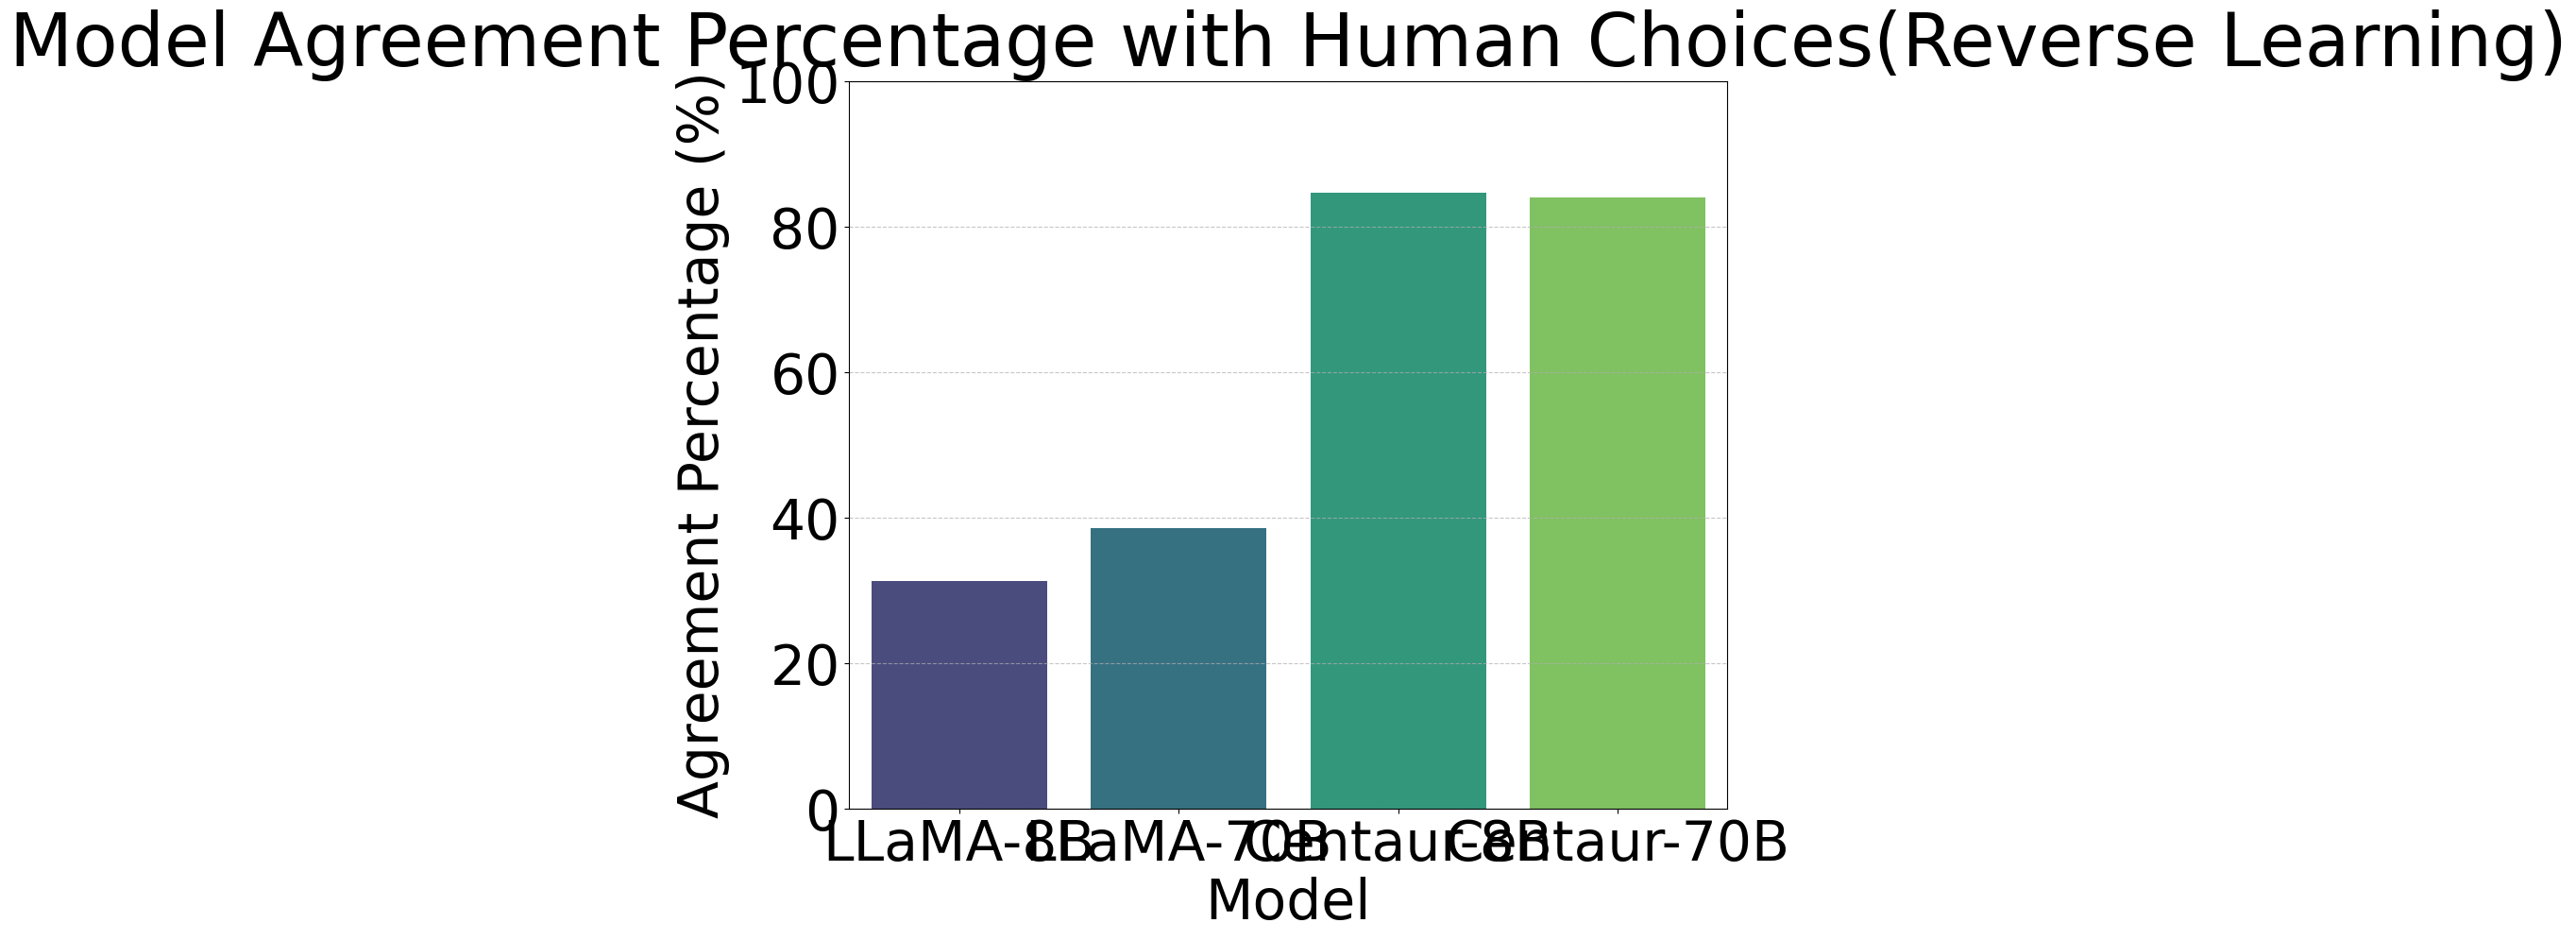

In [52]:
# Create a dictionary to hold the agreement percentages
agreement_data = {
    'Model': ['LLaMA-8B', 'LLaMA-70B', 'Centaur-8B', 'Centaur-70B'],
    'Agreement Percentage': [
        agreement_percentage_8b_llama,
        agreement_percentage_70b_llama,
        agreement_percentage_8b_centaur,
        agreement_percentage_70b_centaur
    ]
}

# Create a pandas DataFrame from the data
agreement_df = pd.DataFrame(agreement_data)

# Create the bar plot
plt.figure(figsize=(12, 10))
sns.barplot(x='Model', y='Agreement Percentage', data=agreement_df, palette='viridis')
plt.title('Model Agreement Percentage with Human Choices(Reverse Learning)')
plt.ylabel('Agreement Percentage (%)')
plt.xlabel('Model')
plt.ylim(0, 100) # Set y-axis limit to 0-100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [53]:
def plot_agreement_and_nll(agreement_percentages, mean_nlls, sem_nlls,
                           model_labels,
                           colors,
                           figsize=(12, 10),
                           agrement='agreement'):
    """
    Generates a grouped bar plot showing model agreement percentages
    and negative log-likelihood (NLL) with error bars.

    Args:
        agreement_percentages (list): List of agreement percentages for each model.
        mean_nlls (list): List of mean NLL values for each model.
        sem_nlls (list): List of SEM values for the mean NLLs.
        model_labels (list): List of labels for each model.
        colors (list): List of colors for the bars.
        figsize (tuple, optional): Figure size. Defaults to (12, 10).
    """
    fig, ax1 = plt.subplots(figsize=figsize)

    # Plot NLL bars on the primary y-axis
    bars = ax1.bar(model_labels, mean_nlls, yerr=sem_nlls, capsize=5,
                   color=colors, edgecolor='black', linewidth=0.3)
    ax1.set_ylabel('Negative Log-Likelihood (NLL)')
    ax1.tick_params(axis='y')

    # Add NLL values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.4f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom',
                     fontsize=18)


    # Create a secondary y-axis for agreement percentage
    ax2 = ax1.twinx()
    ax2.plot(model_labels, agreement_percentages, color='red', marker='o', linestyle='--')
    ax2.set_ylabel(f'{agrement} Percentage (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 100) # Set y-axis limit for percentage to 0-100%

    # Add agreement percentages as text labels next to the markers
    for i, percentage in enumerate(agreement_percentages):
        ax2.annotate(f'{percentage:.2f}%',
                     (model_labels[i], percentage),
                     textcoords="offset points",
                     xytext=(10,10), # Adjust text position
                     ha='left',
                     color='red',
                     fontsize=18)


    # Chance line for NLL
    chance_nll = -np.log(0.5)
    ax1.axhline(chance_nll, ls='--', c='grey', lw=1.2)
    ax1.text(len(model_labels) - 1.5, chance_nll, 'Random guessing (NLL)',
             va='bottom', ha='left', fontsize=18)

    ax1.set_xlabel('Model')
    plt.title(f'Model Performance: NLL and {agrement} Percentage')
    fig.tight_layout()
    plt.show()

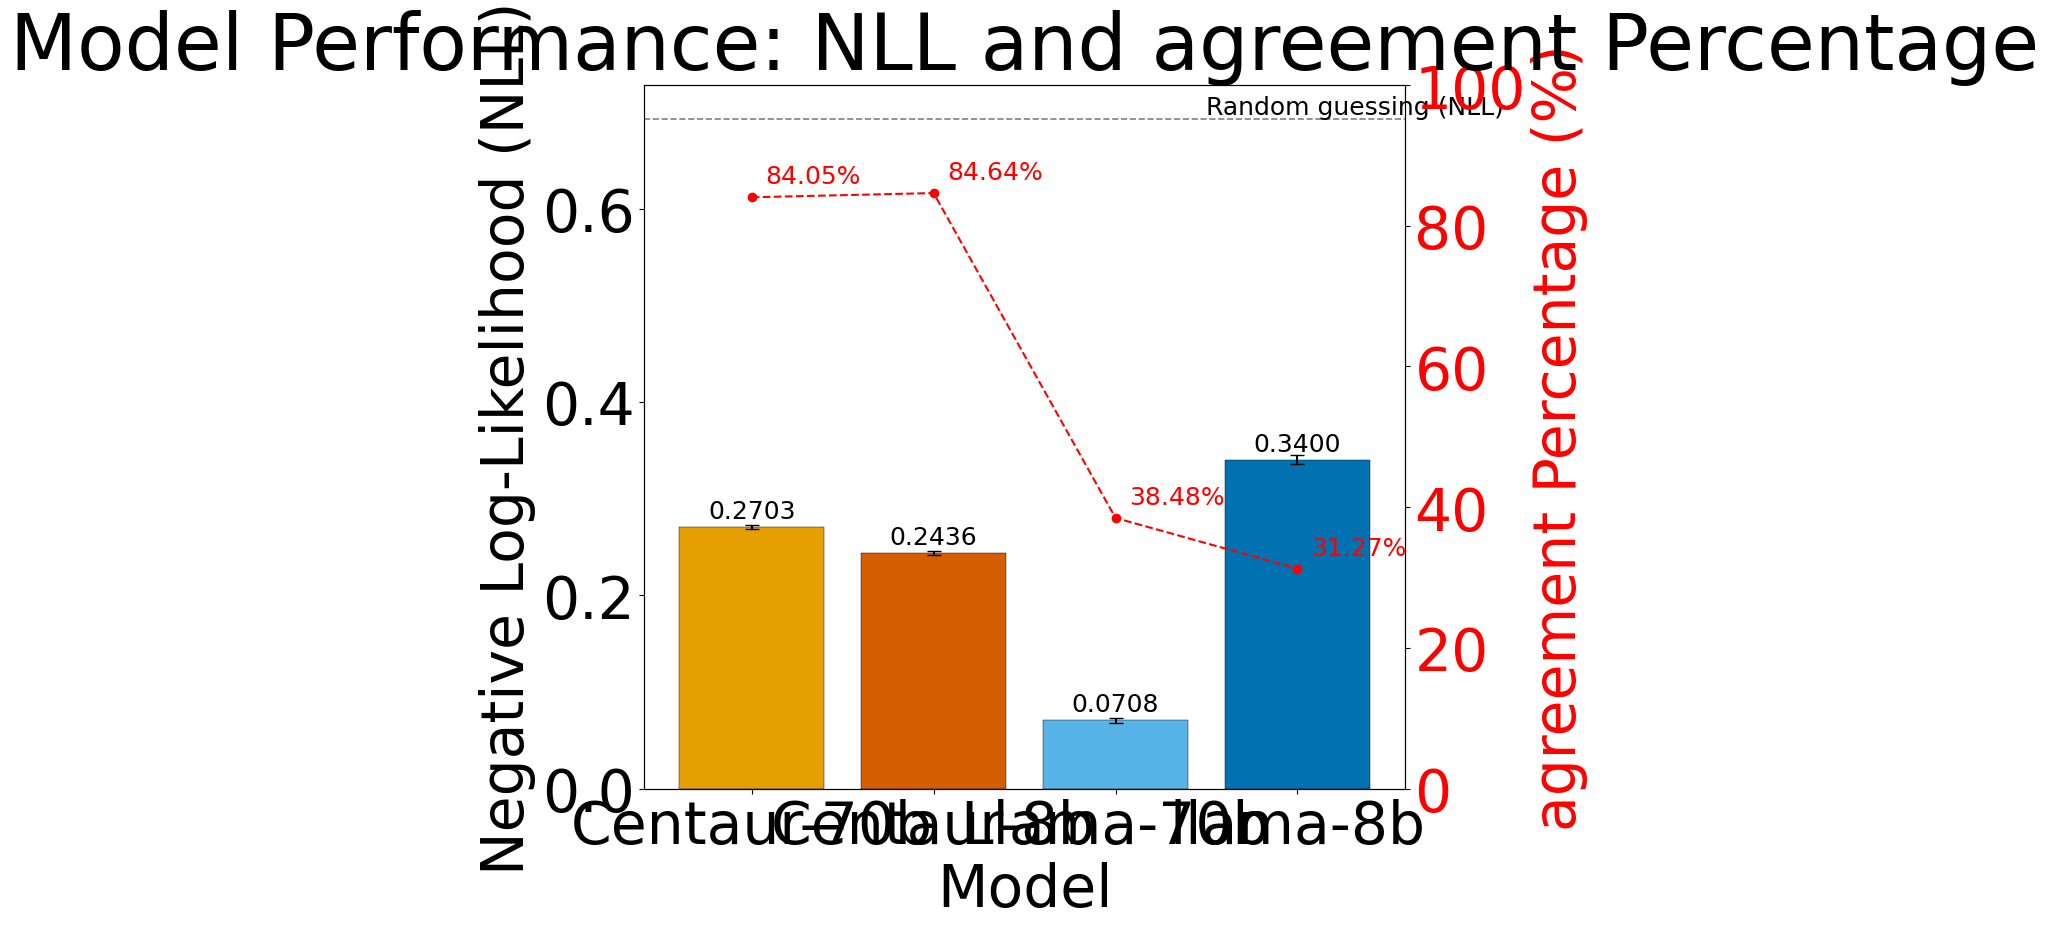

In [54]:
plot_agreement_and_nll(agreement_percentages=[agreement_percentage_70b_centaur,agreement_percentage_8b_centaur,agreement_percentage_70b_llama,agreement_percentage_8b_llama],
                       mean_nlls=[-mean_ll_centaur_70b_model_human,-mean_ll_centaur_8b_human,-mean_ll_llama_70b_model_human,-mean_ll_llama_8b_model_human],
                       sem_nlls=[sem_ll_centaur_70b_model_human,sem_ll_centaur_8b_human,sem_ll_llama_70b_model_human,sem_ll_llama_8b_model_human],
                       model_labels=['Centaur-70b','Centaur-8b','Llama-70b','llama-8b'],
                       colors=['#E69F00', '#D55E00', '#56B4E9', '#0072B2'])

In [55]:
def extract_probs(top2_tokens):
    prob_u = prob_p = None
    for entry in top2_tokens:
        if entry['token'] == 'I':
            prob_u = entry['prob']
        elif entry['token'] == 'H':
            prob_p = entry['prob']
    return pd.Series({'token_I_prob': prob_u, 'token_H_prob': prob_p})

In [56]:
df_llama_free['top2_tokens'] = df_llama_free['top2_tokens'].apply(ast.literal_eval)

C:\Users\snamazova\AppData\Local\Temp\ipykernel_37932\271108117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_llama_free['top2_tokens'] = df_llama_free['top2_tokens'].apply(ast.literal_eval)


In [57]:
df_llama_70b_free['top2_tokens'] = df_llama_70b_free['top2_tokens'].apply(ast.literal_eval)

C:\Users\snamazova\AppData\Local\Temp\ipykernel_37932\3656339606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_llama_70b_free['top2_tokens'] = df_llama_70b_free['top2_tokens'].apply(ast.literal_eval)


In [58]:
df_centaur_70b['top2_tokens']=df_centaur_70b['top2_tokens'].apply(ast.literal_eval)

In [59]:
df_centaur['top2_tokens'] = df_centaur['top2_tokens'].apply(ast.literal_eval)

In [60]:
df_llama_70b_free[['token_I_prob', 'token_H_prob']] = df_llama_70b_free['top2_tokens'].apply(extract_probs)


C:\Users\snamazova\AppData\Local\Temp\ipykernel_37932\610622885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_llama_70b_free[['token_I_prob', 'token_H_prob']] = df_llama_70b_free['top2_tokens'].apply(extract_probs)
C:\Users\snamazova\AppData\Local\Temp\ipykernel_37932\610622885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_llama_70b_free[['token_I_prob', 'token_H_prob']] = df_llama_70b_free['top2_tokens'].apply(extract_probs)


In [61]:
df_llama_free[['token_I_prob', 'token_H_prob']] = df_llama_free['top2_tokens'].apply(extract_probs)

C:\Users\snamazova\AppData\Local\Temp\ipykernel_37932\1714302388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_llama_free[['token_I_prob', 'token_H_prob']] = df_llama_free['top2_tokens'].apply(extract_probs)
C:\Users\snamazova\AppData\Local\Temp\ipykernel_37932\1714302388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_llama_free[['token_I_prob', 'token_H_prob']] = df_llama_free['top2_tokens'].apply(extract_probs)


In [62]:
df_centaur[['token_I_prob', 'token_H_prob']]=df_centaur['top2_tokens'].apply(extract_probs)
df_centaur_70b[['token_I_prob', 'token_H_prob']]=df_centaur_70b['top2_tokens'].apply(extract_probs)

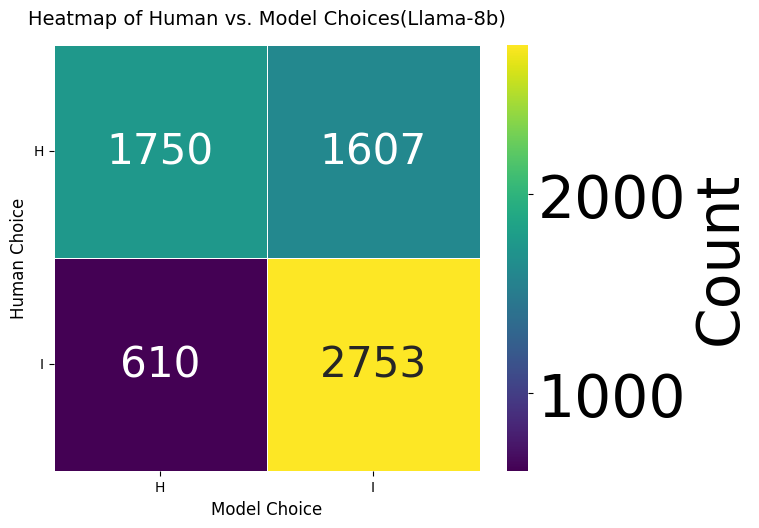

In [63]:
# Group by model and human choices to get count matrix
df_2dhist = pd.DataFrame({
    model_choice: grp['choice'].value_counts()
    for model_choice, grp in df_llama.groupby('model_choice')
}).fillna(0).astype(int)

# Sort for consistent display
df_2dhist = df_2dhist.sort_index(axis=0).sort_index(axis=1)

# Plot
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    df_2dhist,
    annot=True, fmt="d", cmap='viridis',
    cbar_kws={'label': 'Count'},
    linewidths=0.5, linecolor='white',
    square=True
)

# Labels
ax.set_title("Heatmap of Human vs. Model Choices(Llama-8b)", fontsize=14, pad=15)
ax.set_xlabel("Model Choice", fontsize=12)
ax.set_ylabel("Human Choice", fontsize=12)

# Tick styling
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


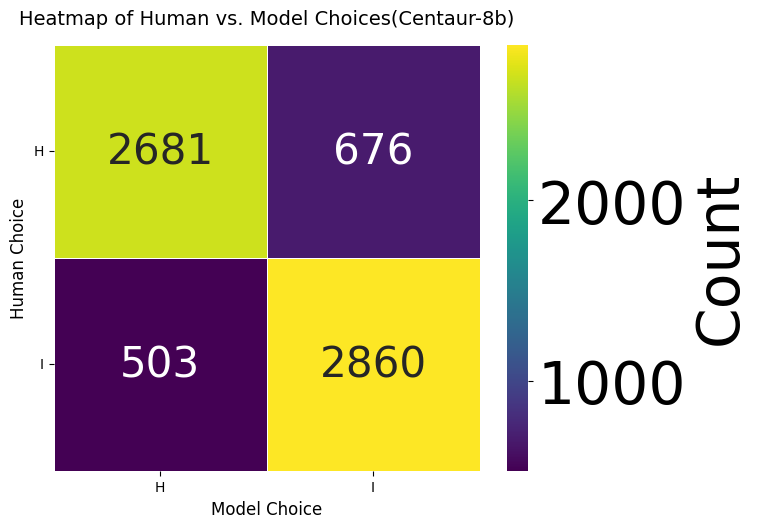

In [64]:

# Group by model and human choices to get count matrix
df_2dhist = pd.DataFrame({
    model_choice: grp['choice'].value_counts()
    for model_choice, grp in df_llama_70b.groupby('model_choice')
}).fillna(0).astype(int)

# Sort for consistent display
df_2dhist = df_2dhist.sort_index(axis=0).sort_index(axis=1)

# Plot
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    df_2dhist,
    annot=True, fmt="d", cmap='viridis',
    cbar_kws={'label': 'Count'},
    linewidths=0.5, linecolor='white',
    square=True
)

# Labels
ax.set_title("Heatmap of Human vs. Model Choices(Centaur-8b)", fontsize=14, pad=15)
ax.set_xlabel("Model Choice", fontsize=12)
ax.set_ylabel("Human Choice", fontsize=12)

# Tick styling
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


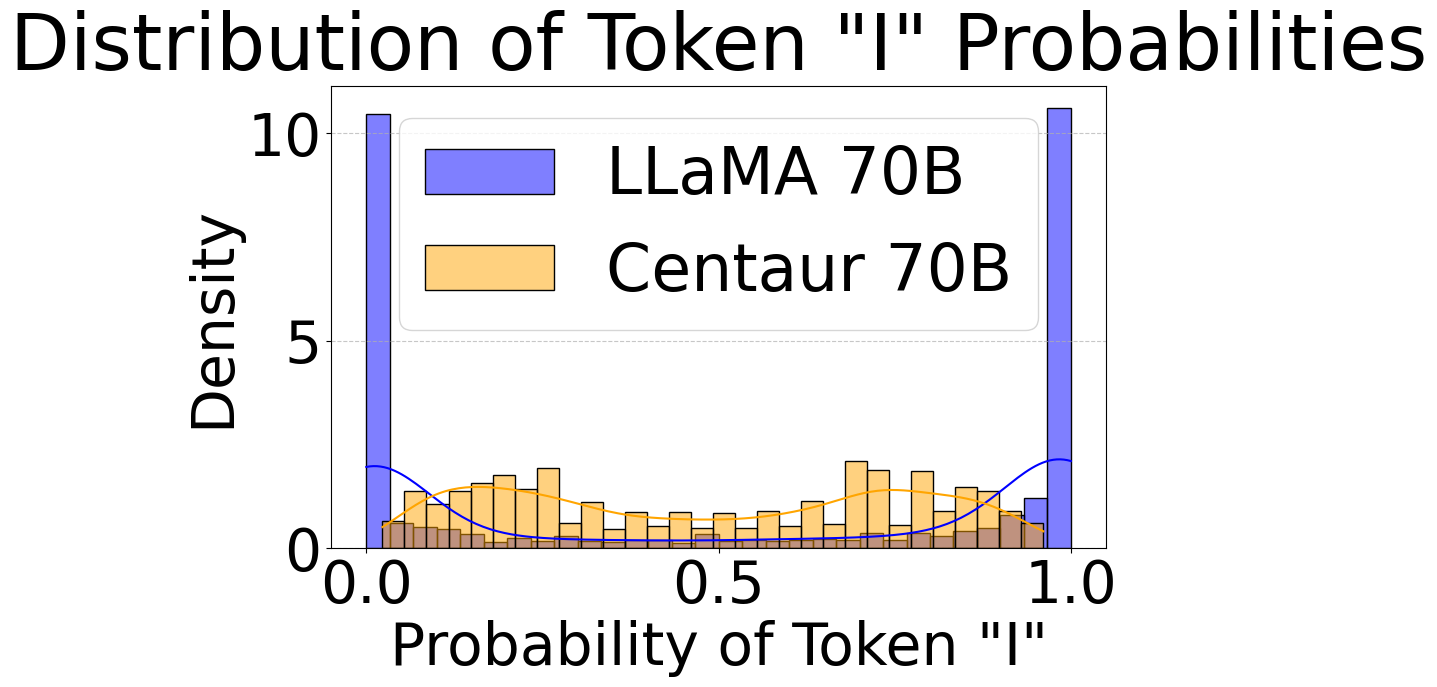

In [65]:
plt.figure(figsize=(10, 6))

# Plot distribution for Llama 70B
sns.histplot(df_llama_70b_free['token_I_prob'], bins=30, kde=True, color='blue', label='LLaMA 70B', stat='density')

# Plot distribution for Centaur 70B
sns.histplot(df_centaur_70b['token_I_prob'], bins=30, kde=True, color='orange', label='Centaur 70B', stat='density')

plt.title('Distribution of Token "I" Probabilities')
plt.xlabel('Probability of Token "I"')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

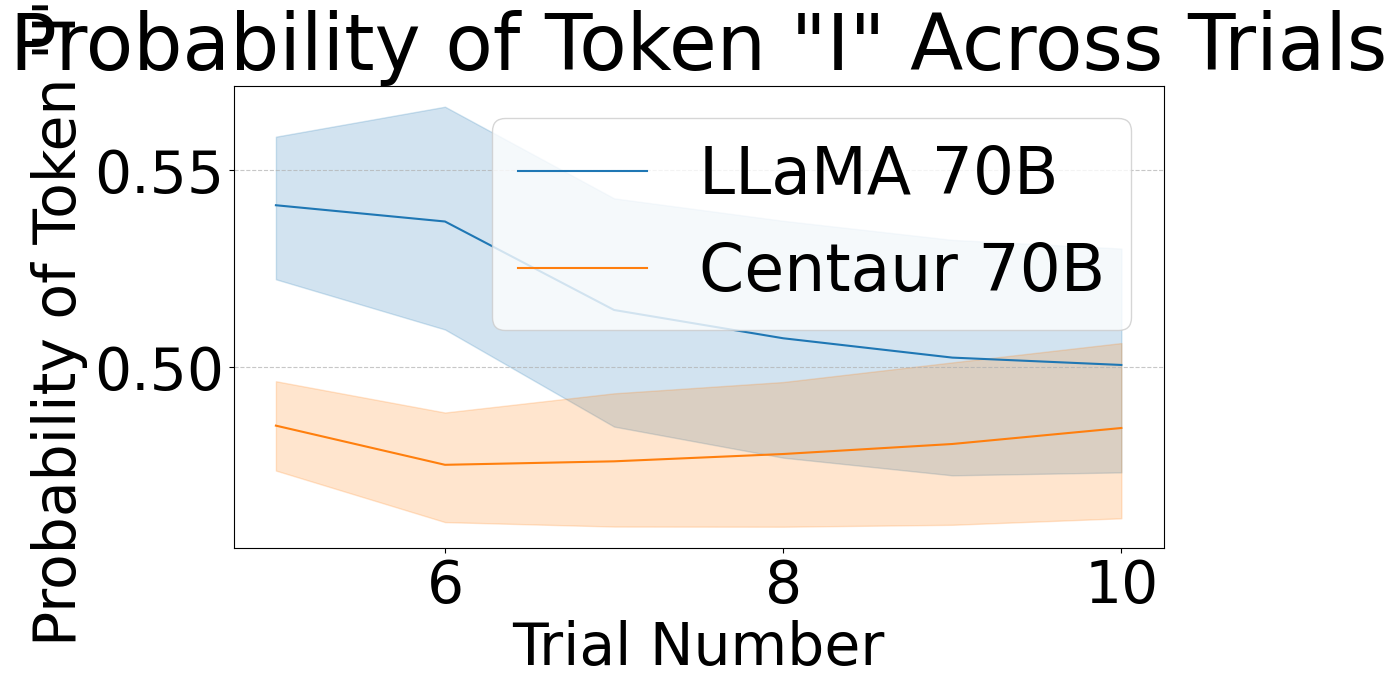

In [66]:
plt.figure(figsize=(12, 6))

# Plot probability of 'I' across trials for Llama 70B
sns.lineplot(data=df_llama_70b_free, x='trial_num', y='token_I_prob', label='LLaMA 70B')

# Plot probability of 'I' across trials for Centaur 70B
sns.lineplot(data=df_centaur_70b, x='trial_num', y='token_I_prob', label='Centaur 70B')

plt.title('Probability of Token "I" Across Trials')
plt.xlabel('Trial Number')
plt.ylabel('Probability of Token "I"')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()